# Project 2: Hyperparameter Exploration in Linear Regression Models
Explore the effects of various hyperparameters, loss functions, and optimizers on the performance of linear regression models using the Body Fat dataset.

## Dataset
Body Fat dataset can be found here:https://drive.google.com/file/d/1_agb6UXyDlG_pS8kNK7URdTDYR-M4lix or https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

## Step 1: Setup and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Load the dataset directly from the Google Drive link
url = 'https://drive.google.com/uc?id=1_agb6UXyDlG_pS8kNK7URdTDYR-M4lix'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


## Step 2: Preprocessing

In [ ]:
# let's handle any potential missing values
data.fillna(data.mean(), inplace=True)

## Q1: Single Variable Linear Regression - Hyperparameters

### Prepare the Dataset

In [ ]:
# Split the data
X = data[['Weight']]  # Adjust 'BodyFat' to any single feature for Q1 and Q2
y = data['Age']  # This is just a placeholder. Adjust the target variable as appropriate for the analysis.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Function to train a model with parameters for learning rate, number of epochs and batch size

In [ ]:
def train_model(learning_rate, epochs, batch_size):
    input_layer = Input(shape=(1,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'LR: {learning_rate}, Epochs: {epochs}, Batch: {batch_size}')
    plt.show()

### Train the model

# Example hyperparameters
train_model(0.1, 50, 10)
train_model(0.05, 100, 20)
train_model(0.2, 30, 5)

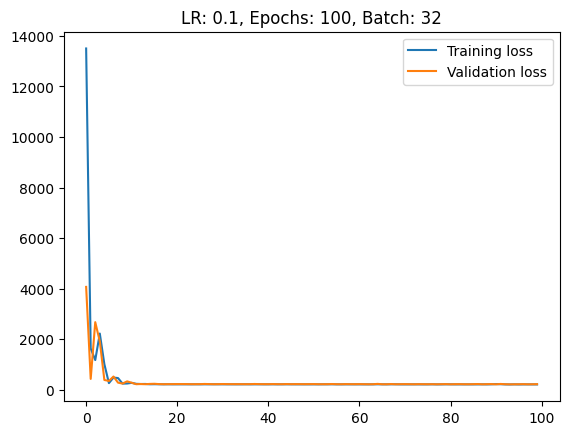

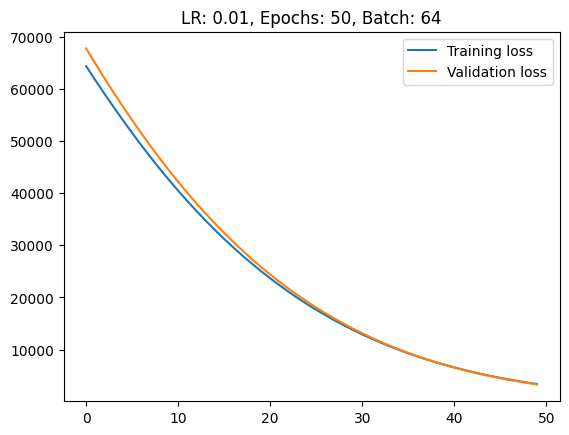

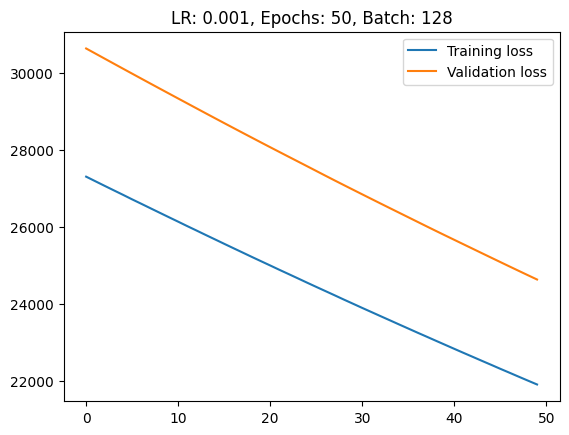

In [ ]:
#my own hyperparameters
train_model(0.1, 100, 32)
train_model(0.01, 50, 64)
train_model(0.001, 50, 128)

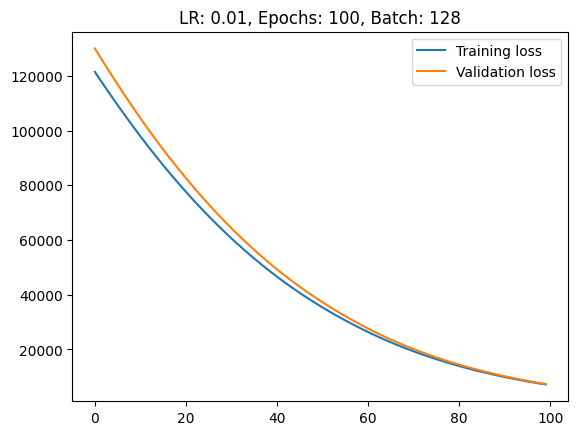

In [ ]:
#another graph with different epochs and diff batch size
train_model(0.01, 100, 128)

## Q2: Experimenting with Loss Functions and Optimizers

Continue to work on the same single variable. Experiment with different loss functions and optimizers. Adjust other model parameters (like different variables or labels if applicable) to see how they influence the model. Provide detailed documentation of your experiments, including learning curves and test results.


### Function to train the model with parameters for optimizer and loss funtion

In [ ]:
def train_model(optimizer, loss_function):
    input_layer = Input(shape=(1,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss=loss_function)
    history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)
    plt.plot(history.history['loss'], label='Training loss') #I think the history methods make it so you can use old variables
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'Optimizer: {optimizer}, Loss Function: {loss_function}')
    plt.show()

### Train the model

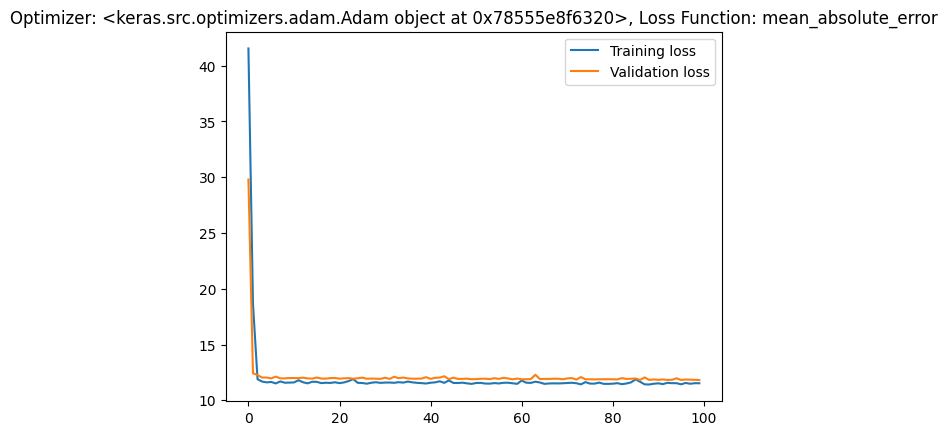

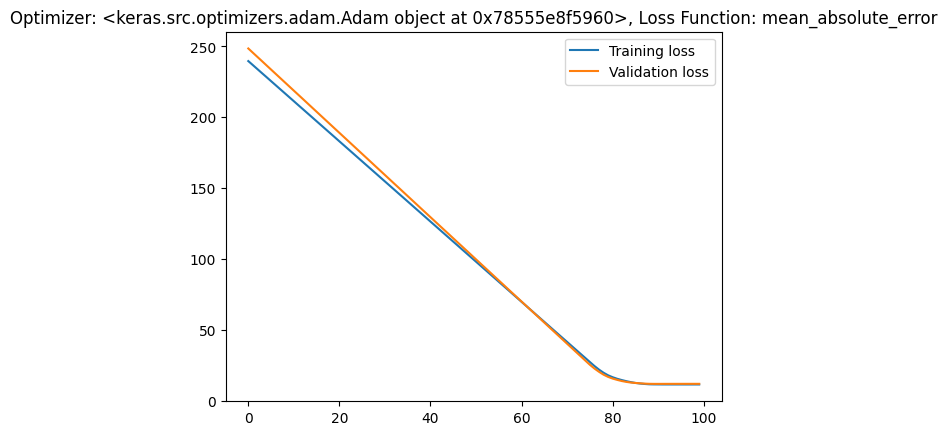

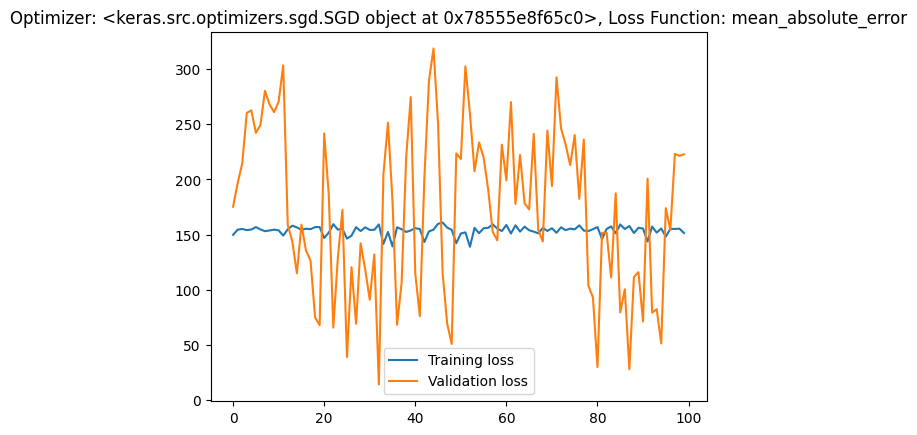

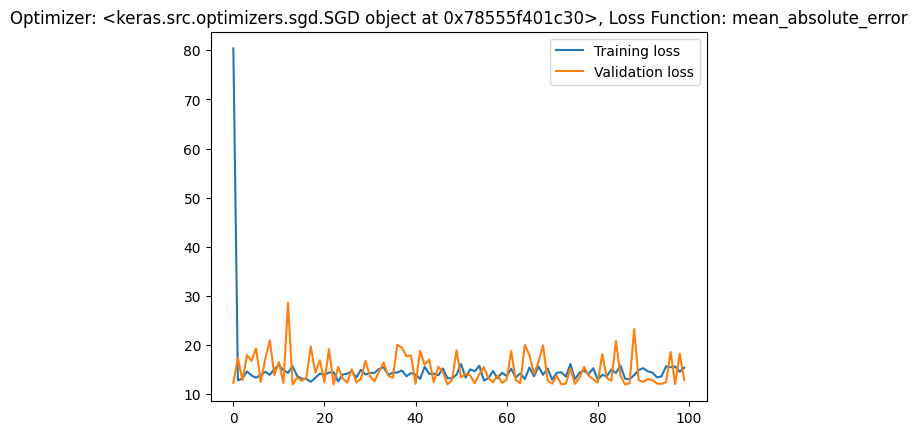

In [ ]:
#testing
train_model(Adam(learning_rate=0.01), 'mean_absolute_error')
train_model(Adam(learning_rate=0.001), 'mean_absolute_error')
train_model(SGD(learning_rate=0.01), 'mean_absolute_error')
train_model(SGD(learning_rate=0.001), 'mean_absolute_error')

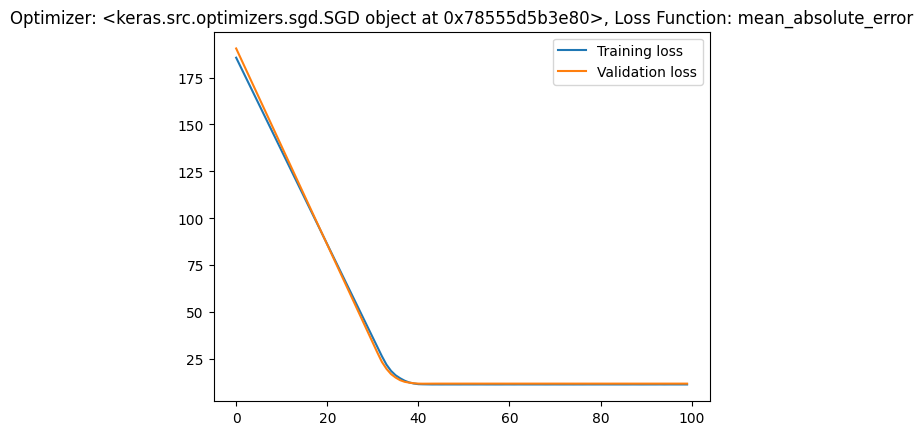

In [ ]:
train_model(SGD(learning_rate=0.00001), 'mean_absolute_error')

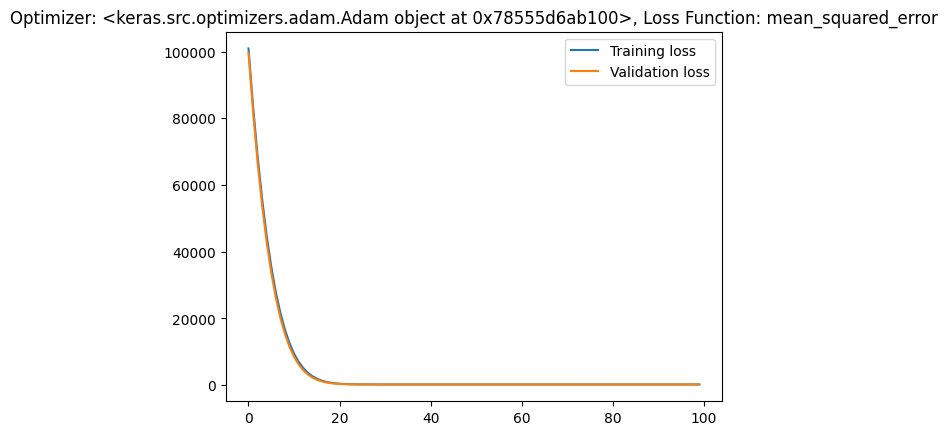

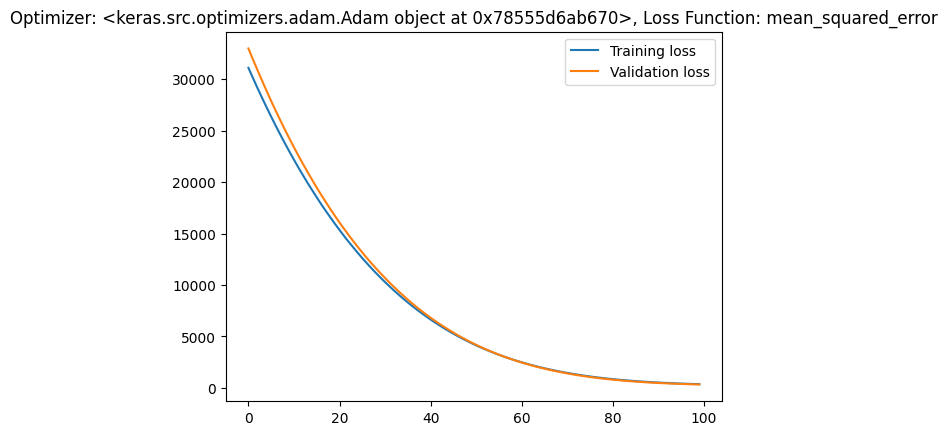

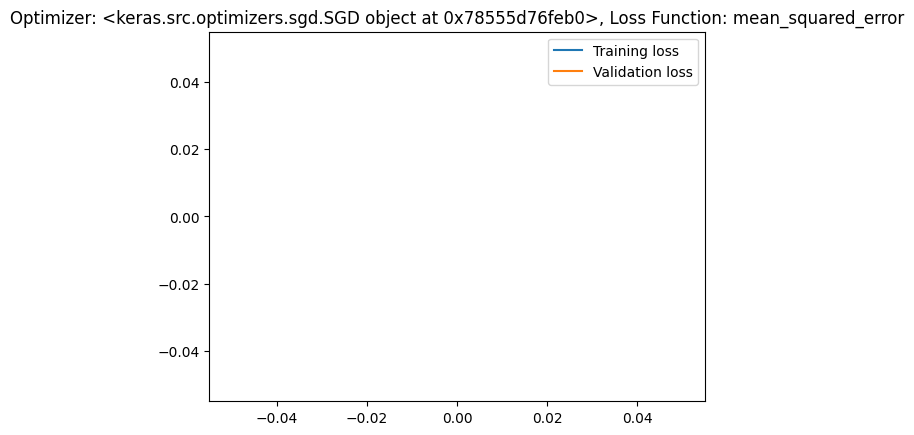

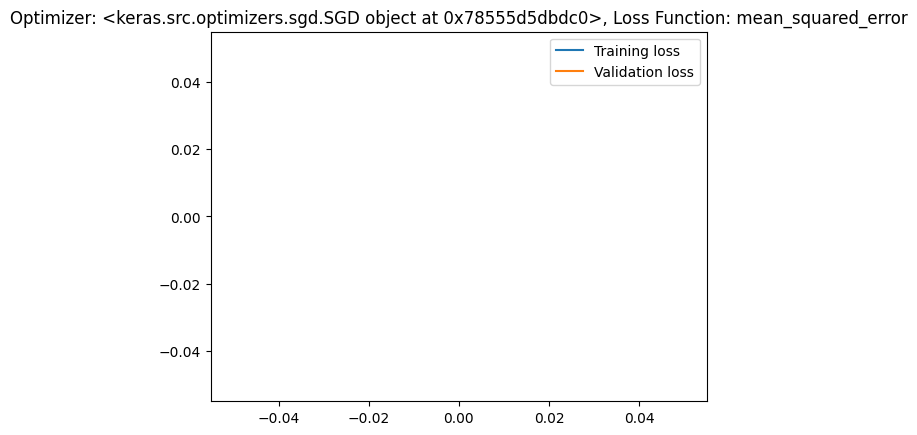

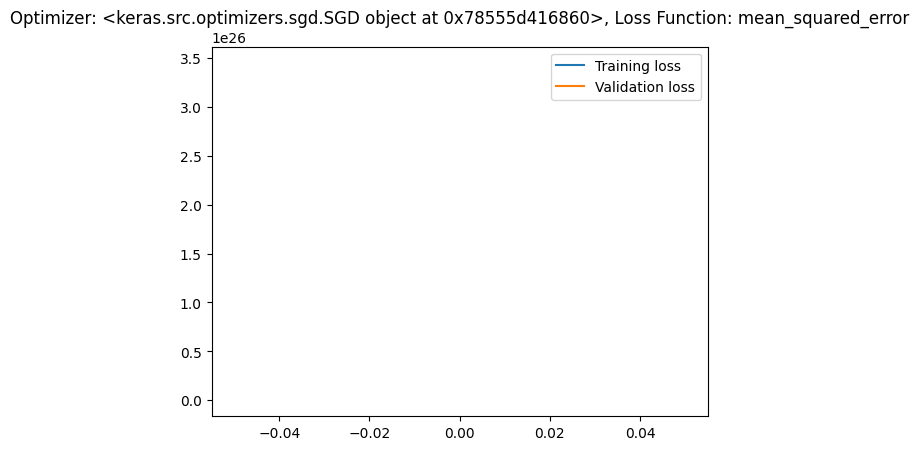

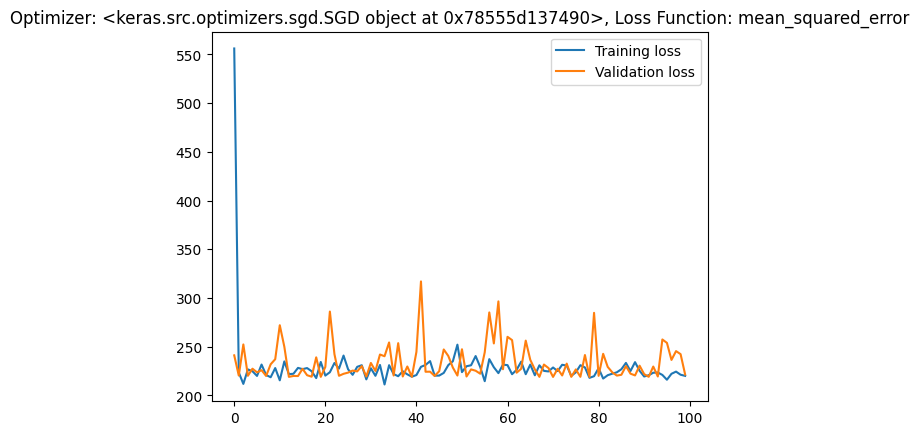

In [ ]:
# Testing different configurations


train_model(Adam(learning_rate=0.01), 'mean_squared_error')
train_model(Adam(learning_rate=0.001), 'mean_squared_error')
train_model(SGD(learning_rate=0.01), 'mean_squared_error')
train_model(SGD(learning_rate=0.001), 'mean_squared_error')
train_model(SGD(learning_rate=0.0001), 'mean_squared_error')
train_model(SGD(learning_rate=0.00001), 'mean_squared_error')

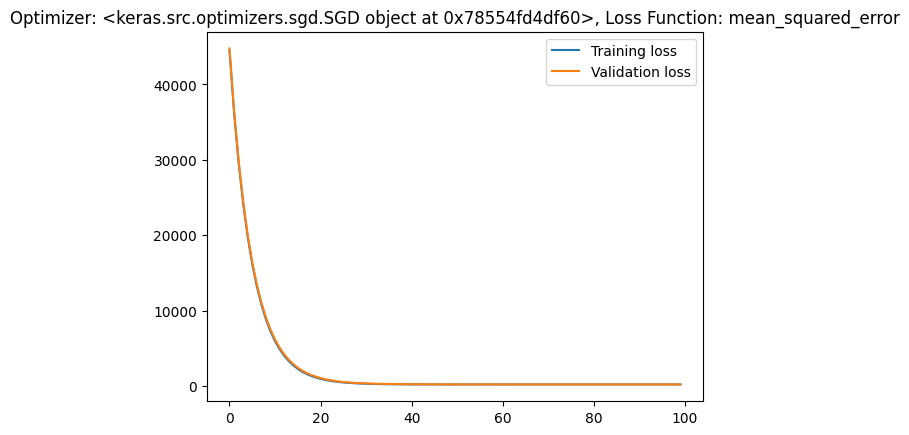

In [ ]:
train_model(SGD(learning_rate=0.0000001), 'mean_squared_error')

## Multiple Variable Linear Regression

### Prepare the Data

In [ ]:
# Setup for multiple variable regression
X_multi = data[['BodyFat', 'Weight']]
y_multi = data['Age']  # Target remains the same
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

## Q3 and Q5: Multiple Variable Linear Regression - Hyperparameters

In [ ]:
# Defining two-variable training function
def train_two_variable_model(learning_rate, epochs, batch_size):
    input_layer = Input(shape=(2,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    history = model.fit(X_train_multi, y_train_multi, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'LR: {learning_rate}, Epochs: {epochs}, Batch: {batch_size}, Features: BodyFat and Weight')
    plt.show()

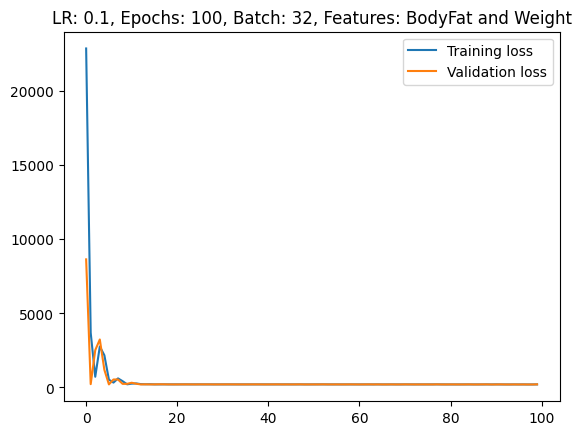

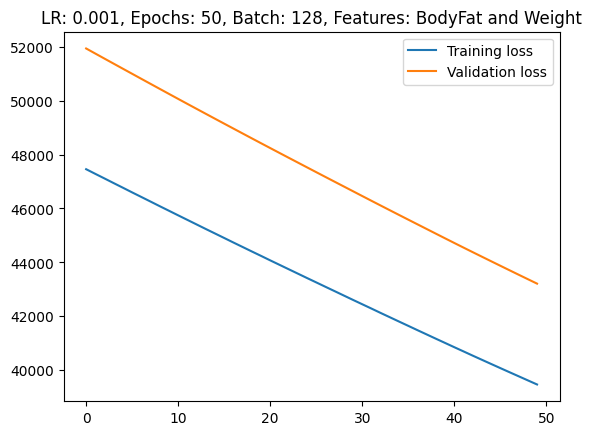

In [ ]:
#my own hyperparameters
train_two_variable_model(0.1, 100, 32)
train_two_variable_model(0.001, 50, 128)

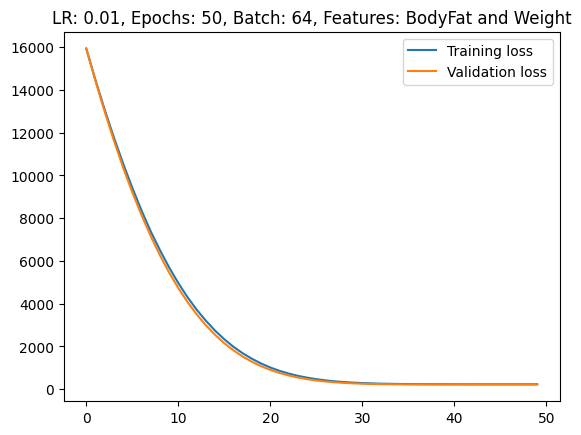

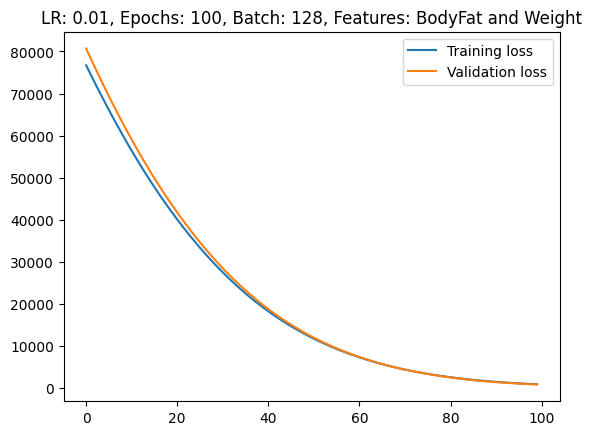

In [ ]:
train_two_variable_model(0.01, 50, 64)
train_two_variable_model(0.01, 100, 128)

In [ ]:
X_many = data[['Height', 'BodyFat', 'Abdomen']]  # Example features - feel free to change
y_many = data['Weight']  # Target variable
X_train_many, X_test_many, y_train_many, y_test_many = train_test_split(
    X_many, y_many, test_size=0.2, random_state=42
)

In [ ]:
def train_multi_variable_advanced_model(learning_rate, epochs, batch_size): # Add epochs and batch_size to the function definition
    input_layer = Input(shape=(3,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    # Changed X_train_multi to X_train_many
    history = model.fit(X_train_many, y_train_many, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'LR: {learning_rate}, Epochs: {epochs}, Batch: {batch_size}, Features:Height, BodyFat, Abdomen')
    plt.show()

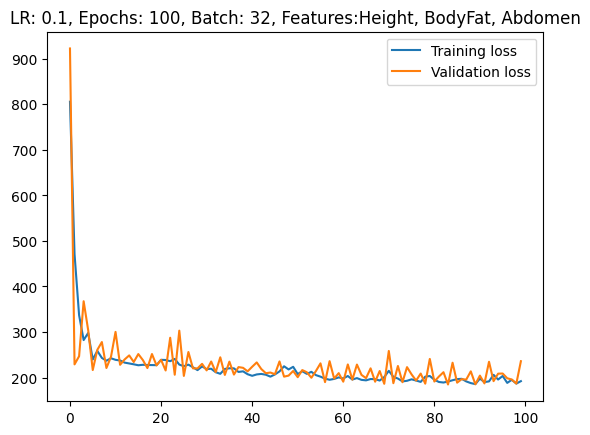

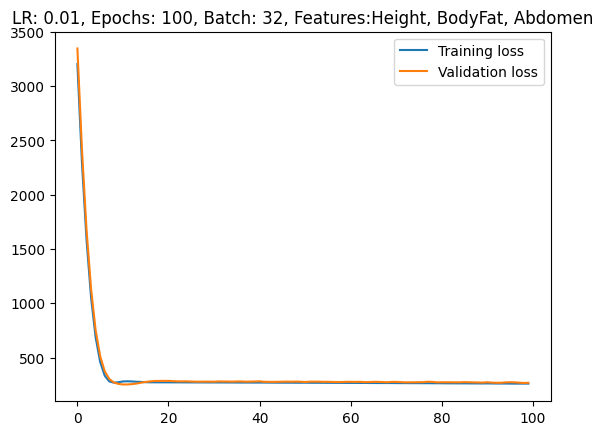

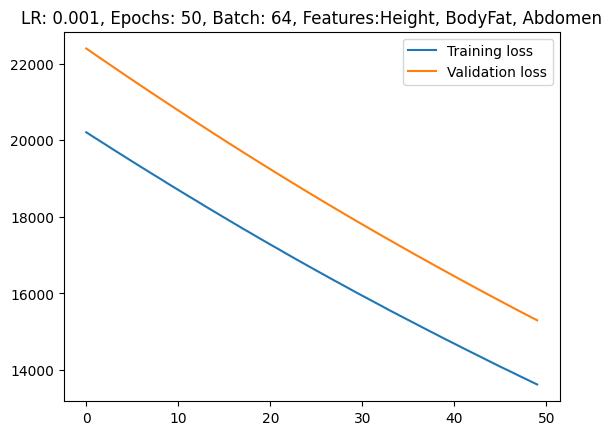

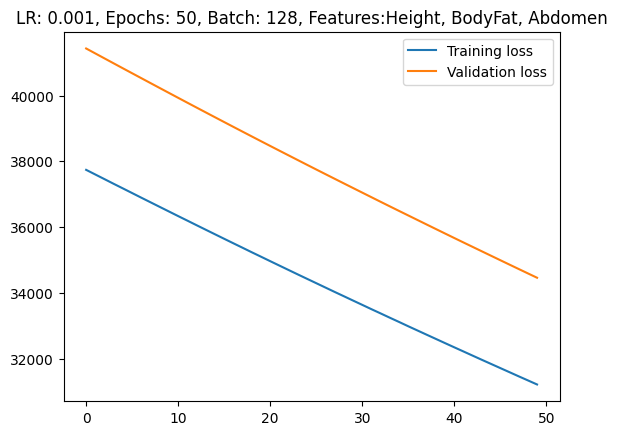

In [ ]:
train_multi_variable_advanced_model(0.1, 100, 32)
train_multi_variable_advanced_model(0.01, 100, 32)
train_multi_variable_advanced_model(0.001, 50, 64)
train_multi_variable_advanced_model(0.001, 50, 128)

In [ ]:
def train_multi_variable_advanced_model(learning_rate, epochs, batch_size): # Add epochs and batch_size to the function definition
    input_layer = Input(shape=(3,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history = model.fit(
        X_train_many,
        y_train_many,
        epochs=epochs, # Use the epochs argument
        batch_size=batch_size, # Use the batch_size argument
        validation_split=0.2,
        verbose=0,
    )
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'Optimizer: Adam, Learning Rate: {learning_rate}, Loss Function: {loss_function}') # Update title
    plt.show()

In [ ]:
train_multi_variable_advanced_model(0.1, 100, 32)
train_multi_variable_advanced_model(0.001, 50, 128)

ValueError: No loss to compute. Provide a `loss` argument in `compile()`.

## Q4 **and** Q6: Experimenting with Loss Functions and Optimizers for Multiple Variable Linear Regression

In [ ]:
# Defining the function to test different optimizers and loss functions for two-variable model
def train_two_variable_advanced_model(optimizer, loss_function):
    input_layer = Input(shape=(2,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss=loss_function)
    history = model.fit(X_train_multi, y_train_multi, epochs=100, batch_size=10, validation_split=0.2, verbose=0)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'Optimizer: {optimizer}, Loss Function: {loss_function}')
    plt.show()

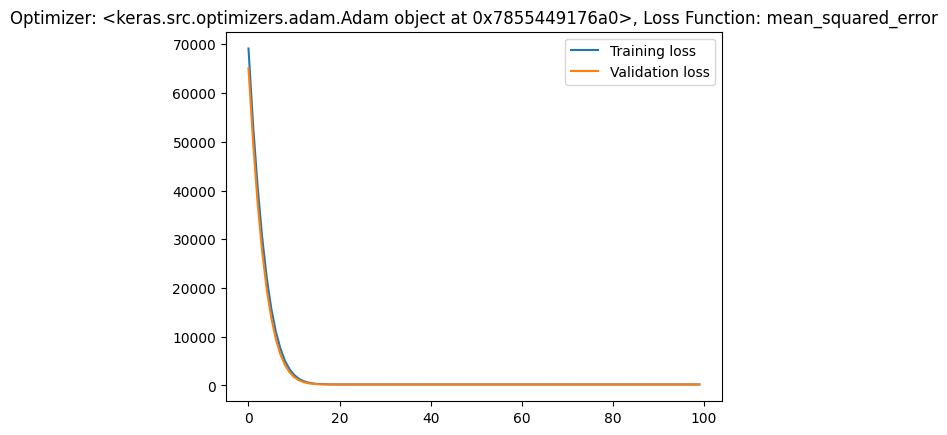

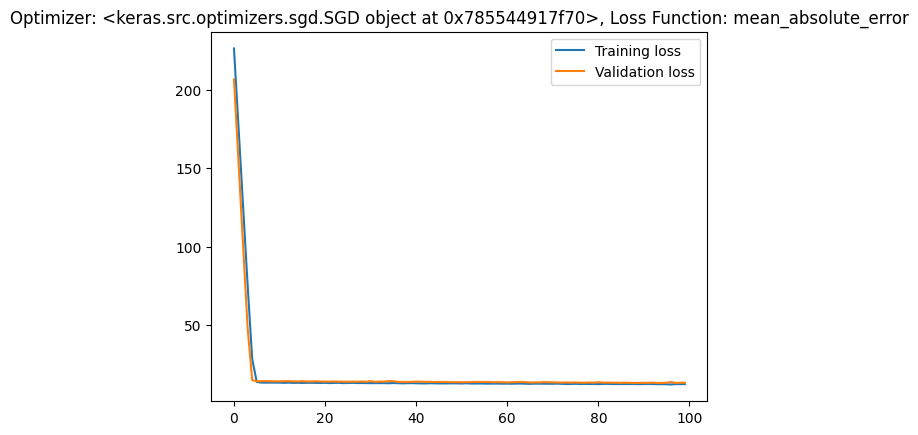

In [ ]:
# Testing various optimizer and loss function configurations
train_two_variable_advanced_model(Adam(learning_rate=0.01), 'mean_squared_error')
train_two_variable_advanced_model(SGD(learning_rate=0.0001), 'mean_absolute_error')

In [ ]:
# Defining the function to test different optimizers and loss functions for two-variable model
def train_multi_variable_advanced_model(optimizer, loss_function):
    input_layer = Input(shape=(3,))
    output_layer = Dense(1)(input_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss=loss_function)
    history = model.fit(X_train_many,  # Use the new training data
        y_train_many,
        epochs = 100,
        batch_size = 10,
        validation_split=0.2,
        verbose=0,)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title(f'Optimizer: {optimizer}, Loss Function: {loss_function}')
    plt.show()

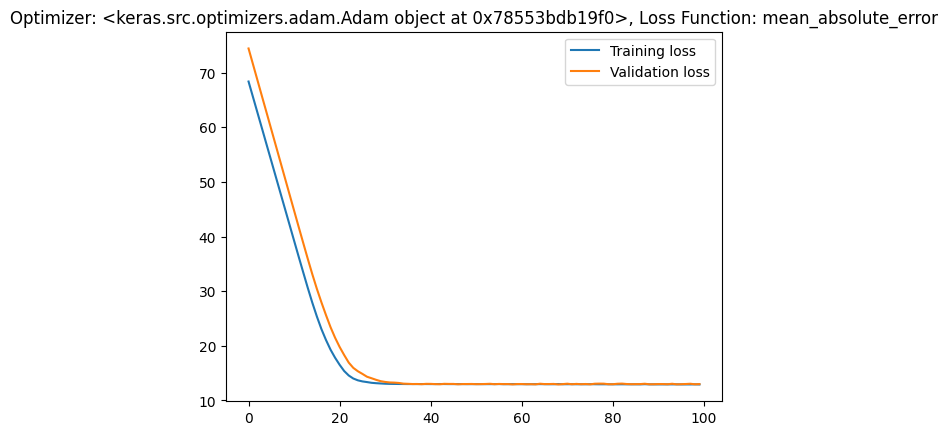

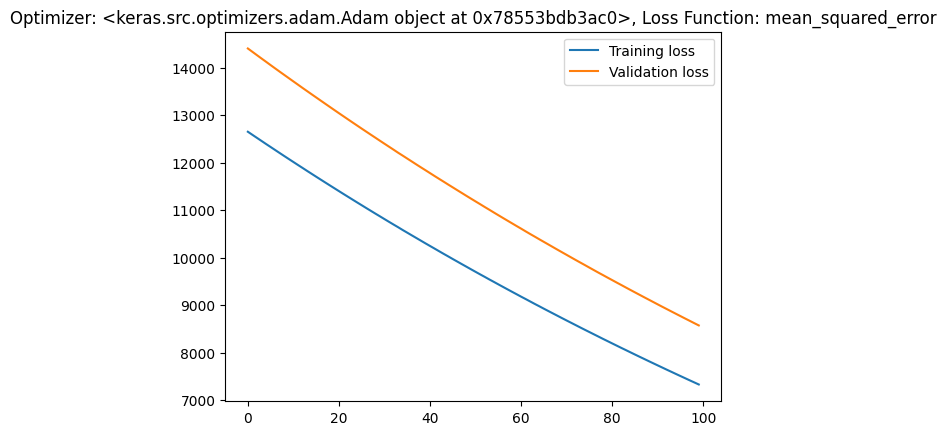

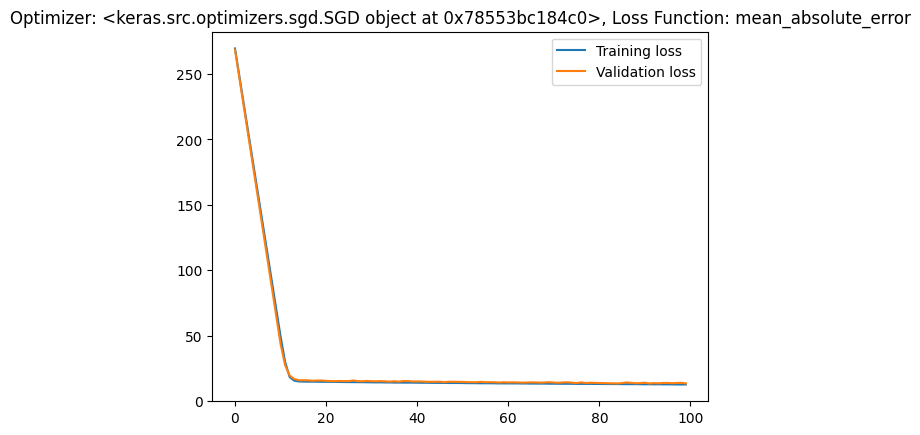

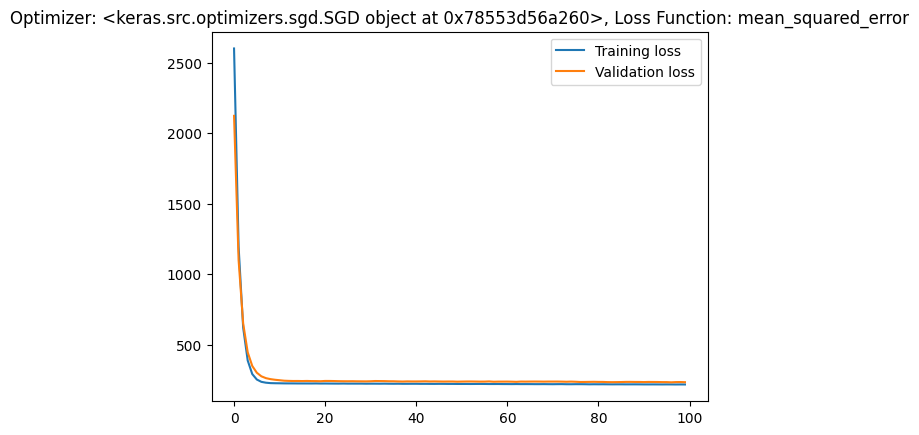

In [ ]:
train_multi_variable_advanced_model(Adam(learning_rate=0.001), 'mean_absolute_error')
train_multi_variable_advanced_model(Adam(learning_rate=0.0001), 'mean_squared_error')
train_multi_variable_advanced_model(SGD(learning_rate=0.0001), 'mean_absolute_error')
train_multi_variable_advanced_model(SGD(learning_rate=0.000001), 'mean_squared_error')

## Q7: Reflection